# Demonstration: Anomaly detection algorithm

In [1]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars
import joblib  # Writing and loading

from PhaseEstimation import encoder as enc, vqe, visualization as qplt
##############

In [2]:
lr = .3
epochs = 3000

N = 6
side = 100

In [3]:
myvqe = vqe.load_vqe('../data/vqes/ANNNI/N'+str(N)+'n'+str(side)) # Load VQE
myenc  = enc.encoder(myvqe, enc.encoder_circuit)                  # Construct Encoder

In [4]:
print(myenc)

0: ──||──||──RY(0.00)──────────╭C─────||──RZ(6.00)───────────╭C────────||──RZ(12.00)──────────╭C───
1: ──||──||──RY(1.00)──────────│──╭C──||──RZ(7.00)───────────│──╭C─────||──RZ(13.00)──────────│──╭C
2: ──||──||──RY(2.00)─╭C────╭Z─╰X─│───||──RZ(8.00)──╭C─╭Z────│──│──╭X──||──RZ(14.00)─╭C────╭Z─│──╰X
3: ──||──||──RY(3.00)─╰Z─╭C─│─────╰X──||──RZ(9.00)──│──╰C─╭Z─╰X─│──│───||──RZ(15.00)─╰Z─╭C─│──│──╭X
4: ──||──||──RY(4.00)────╰Z─╰C─╭X─────||──RZ(10.00)─╰Z────╰C────╰X─│───||──RZ(16.00)────╰Z─╰C─╰X─│─
5: ──||──||──RY(5.00)──────────╰C─────||──RZ(11.00)────────────────╰C──||──RZ(17.00)─────────────╰C

───||──RZ(18.00)─┤     
───||──RZ(19.00)─┤     
───||──RZ(20.00)─┤  <Z>
───||──RZ(21.00)─┤  <Z>
───||──RZ(22.00)─┤  <Z>
───||──RZ(23.00)─┤     


In [5]:
trainingpoints = [0,side-1, side*side -side]

Cost: 3.7848949432373047e-06: 100%|██████████| 3000/3000 [00:14<00:00, 209.67it/s]


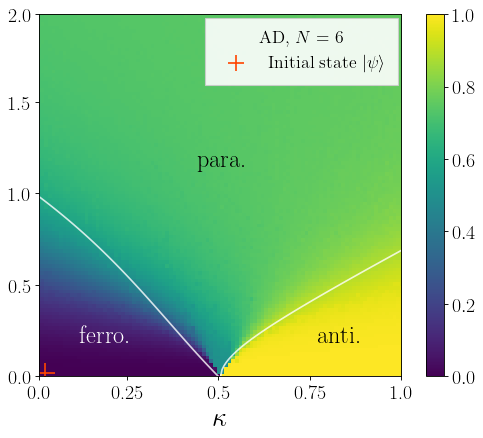

Cost: 0.1256410777568817: 100%|██████████| 3000/3000 [00:12<00:00, 240.90it/s] 


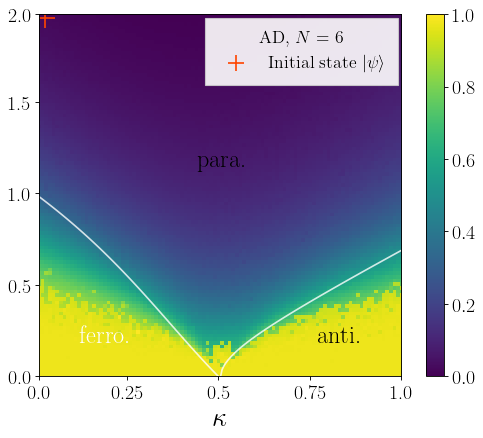

Cost: 7.808208465576172e-06: 100%|██████████| 3000/3000 [00:15<00:00, 195.44it/s]


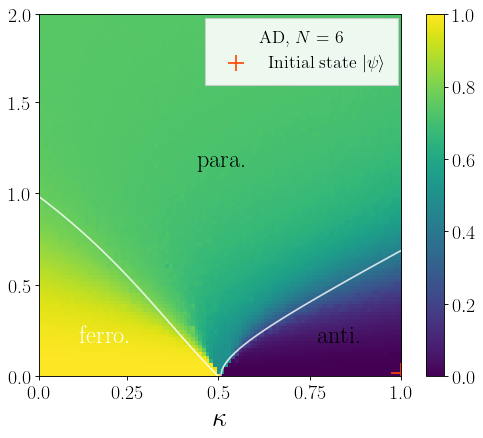

In [6]:
for trainingpoint in trainingpoints:
    myenc  = enc.encoder(myvqe, enc.encoder_circuit)
    myenc.train(lr, epochs, np.array([trainingpoint]), circuit = False)
    qplt.show_compression_ANNNI(myenc, trainingpoint, plot3d = False)
    plt.show()

Cost: 7.569789886474609e-06: 100%|██████████| 1000/1000 [00:10<00:00, 92.67it/s] 


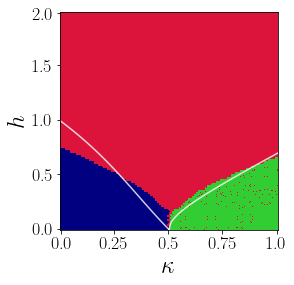

In [4]:
_ = enc.enc_classification_ANNNI(myvqe, .1, 1000)